# <center>  ACC Transport  </center> #

In [1]:
# Some parameters
VAR = 'Tav'  # Pick what plot
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Year = 'Tav.nc'
Qplot = 'Y'

In [2]:
# Load in Modules
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from Full_channel import *
from HB_Plot import nf, fmt
%matplotlib inline

if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ']

# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Full'


# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/'+Year
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)
# Set Parameters
alpha = 2.000000E-04
g = -9.81
rho_0 = 1000
C_p = 3985
gridfilepath = x+'/3/'
file2 = netCDF4.Dataset(gridfilepath+'grid.nc', 'r')
Zp = file2.variables['Zp1'][:]
Z = file2.variables['Z'][:]
Xp = file2.variables['Xp1'][:]
X = file2.variables['X'][:]
Y = file2.variables['Yp1'][:]
Depth = file2.variables['Depth'][:]
Yc = file2.variables['Y'][:]
msk = file2.variables['HFacS'][:]
msku = file2.variables['HFacW'][:]
mskt = file2.variables['HFacC'][:]
lmsk = msk.mean(axis=2)
lmsk[lmsk==0]=np.nan
lmsk[~np.isnan(lmsk)] = 1
Zmatrix = np.zeros((len(Z), len(Yc)))
Zmatrix[:, :] = 1
dx = Y[1]-Y[0]  # Find Resolution
dz = Zp[0:len(Zp)-1]-Zp[1:len(Zp)]
dzc = Z[0:len(Z)-1]-Z[1:len(Z)]
ny = len(Y)
nz = len(Z)

Transport given by:
\begin{equation}
T=\iint u \mathrm{d}z\mathrm{d}y
\end{equation}

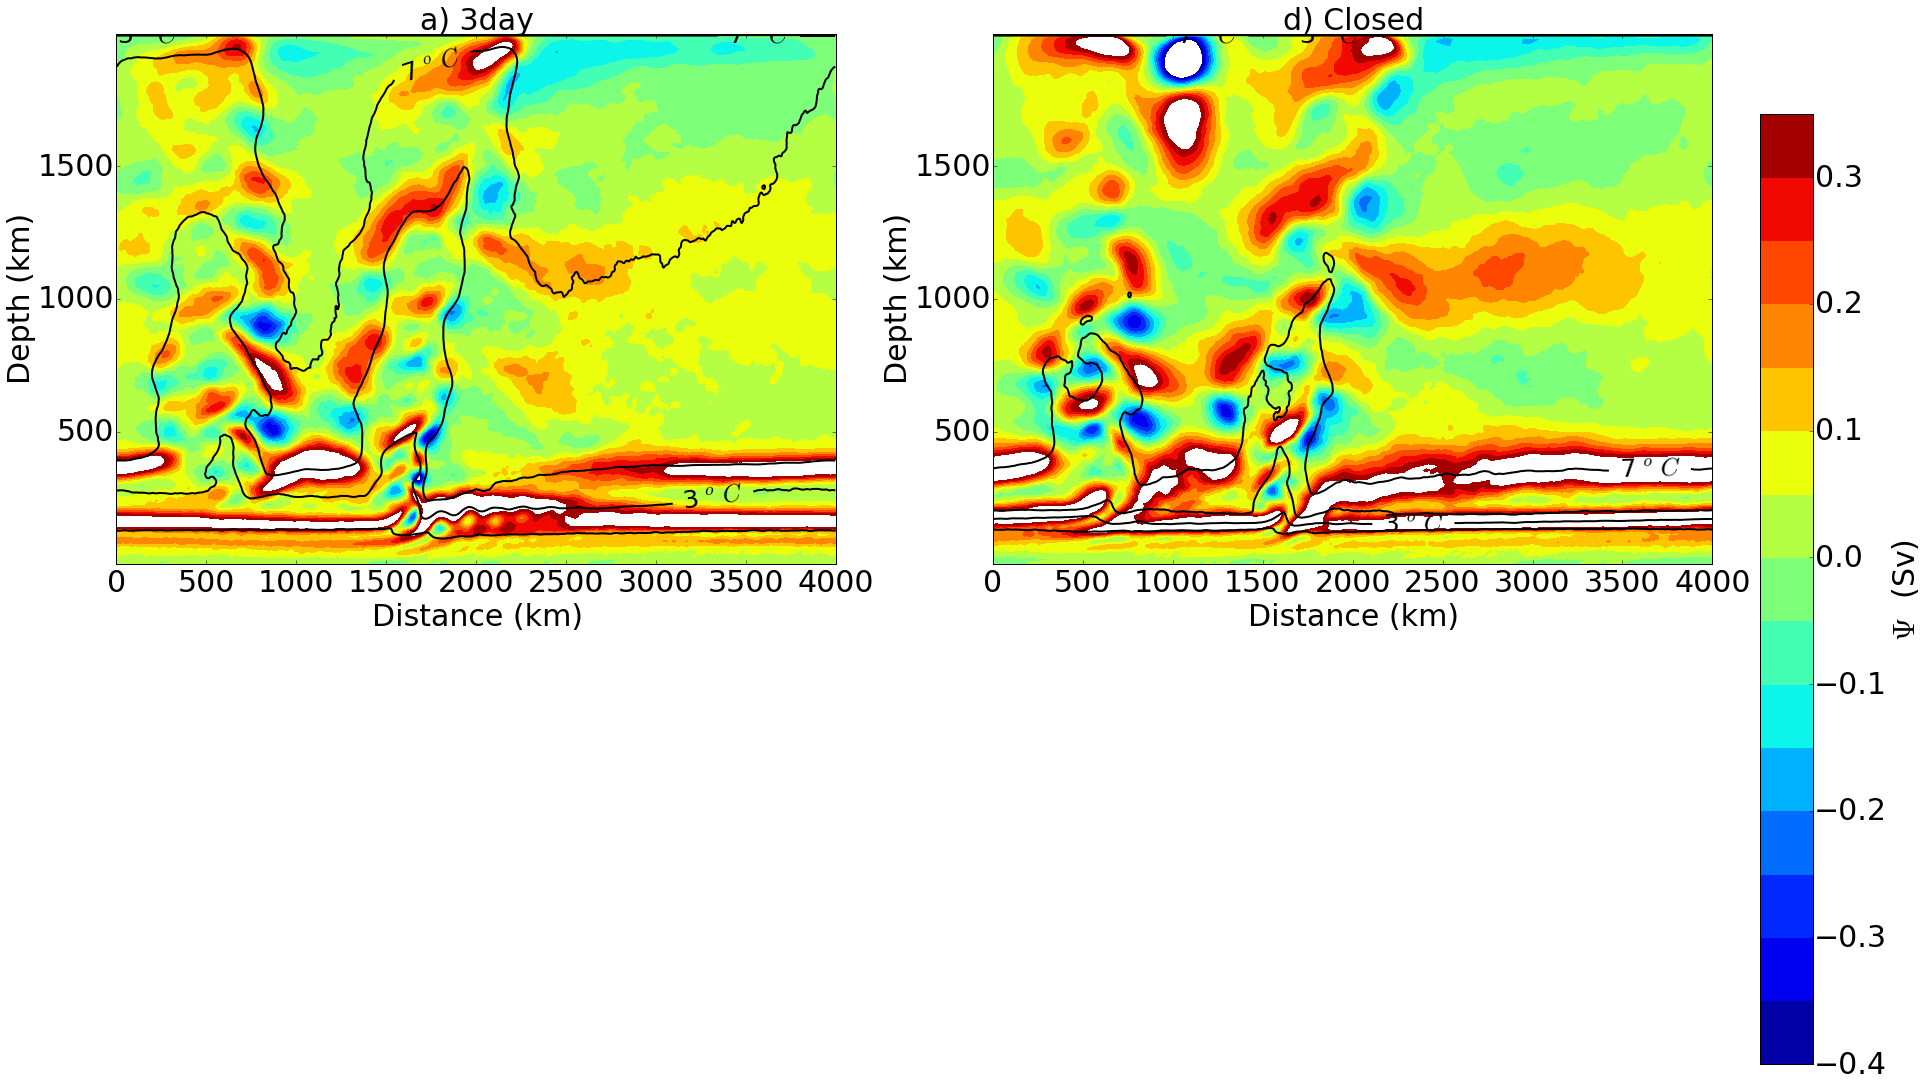

In [6]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-.4, .4, .05)
Psi_ticks =np.arange(-8., 8., 1.)
Eddy_ticks = (np.arange(-20, 1, 4.))
E_levs = np.arange(-20., 1, 2.)
for i in range(len(Runs)):
    A = x+'/'+str(tau[Runs[i]])+'/Tav.nc'
    file2 = netCDF4.Dataset(A, 'r')
    U = file2.variables['UVEL'][:].mean(axis=0)
    T = file2.variables['THETA'][:].mean(axis=0)
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,2))
    p = ax.contourf(Xp/1000, Yc/1000, U[0:15,:,:].mean(axis=0),Psi_levs, cmap=plt.cm.jet)
    q = ax.contour(X/1000, Yc/1000, T[0:15,:,:].mean(axis=0), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)